In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")
df.head(7)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [46]:
df1 = df.drop(["stab"], axis=1)
df1

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [47]:
df1.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [48]:
df1.groupby("stabf").stabf.count().to_frame()

,stabf
stabf,
stable,3620
unstable,6380


In [49]:
y = df1.stabf
X = df1.drop(["stabf"], axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1) 
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.stabf = le.fit_transform(df1.stabf)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [44]:
import imblearn 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=1) 
X_train, y_train = smote.fit_sample(x_train, y_train)

In [52]:
# Use the Standard Scaler to transform the train set(X_train, y_train) and test set(X_test)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train, y_train)


#y_train = Scaler.fit_transform(y_train) 



X_test = Scaler.fit_transform(X_test) 




In [20]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(random_state = 1)
RFC_model.fit(X_train, y_train)
RFC_y_pred = RFC_model.predict(X_test)
print(RFC_y_pred)
RFC_model.score(X_test, y_test)

[1 1 0 ... 0 0 1]


0.928

In [53]:
# Extra TreesClassifier Model
from sklearn.ensemble import ExtraTreesClassifier
ETC_model = ExtraTreesClassifier(random_state=1)
ETC_model.fit(X_train, y_train)
ETC_y_pred = ETC_model.predict(X_test)
print(ETC_y_pred)
ETC_model.score(X_test, y_test)

[1 1 0 ... 0 1 1]


0.926

In [54]:
# Xgboost Model #Extreme Boosting Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print(xgb_y_pred)
xgb_model.score(X_test, y_test)

[1 1 0 ... 0 1 1]


0.946

In [55]:
# lightgbm # Light gradient boosting model
import lightgbm as ltb
ltb_model = ltb.LGBMClassifier(random_state=1)
ltb_model.fit(X_train, y_train)
ltb_y_pred = ltb_model.predict(X_test)
print(ltb_y_pred)
ltb_model.score(X_test, y_test)

[1 1 0 ... 0 1 1]


0.9365

In [56]:
#Cross Validation
from sklearn.model_selection import cross_val_score 
scores   =   cross_val_score(RFC_model, X_train, y_train, cv=5, scoring='f1_macro')
scores 

array([0.91143756, 0.91136454, 0.91564855, 0.90214725, 0.91555674])

In [63]:
# K-foldCross Validation
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5) 
kf.split(X_train)   
f1_scores = [] 
#run   for   every   split 
for train_index, test_index in kf.split(X_train): 
    x_train, x_test = np.array(X_train)[train_index], np.array(X_train)[test_index] 
    y_train, y_test = y_train[train_index], y_train[test_index]
    model = RFC_model.fit(x_train, y_train)                                    
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='stabf')*100)   
                                      

In [ ]:
# Stratified Kfold Cross Validation
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=1) 
f1_score = [] 
#run   for   every   split 
for train_index, test_index in skf.split(X_train, y_train): 
    X_train, X_test = np.array(X_train)[train_index], np.array(X_train)[test_index] 
    y_train, y_test = y_train[train_index], y_train[test_index] 
    model = RFC_model.fit(X_train,   y_train) 
    #save   result   to   list 
    f1_scores.append(f1_score(y_true=y_test,   y_pred=RFC_model.predict(X_test),   pos_label=  'stabf'  ))   

In [ ]:
#Leave One Out
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut() 
scores = cross_val_score(RFC_model, X_train, y_train, cv=loo, scoring=  'f1_macro'  ) 
average_score = scores.mean()*100   

In [61]:
# Metrics
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix 
new_predictions = RFC_model.predict(X_test) 
cnf_mat = confusion_matrix(y_test, new_predictions, labels=['stabf', 'g4']) 
cnf_mat    

In [60]:
#Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))   
 

In [ ]:
#Precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stabf') 
print('Precision: {}'.format(round(precision*100), 2))

In [ ]:
#Recall
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stabf') 
print('Recall: {}'.format(round(recall*100), 2))

In [ ]:
#f1 score
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stabf') 
print('F1: {}'.format(round(f1*100), 2))

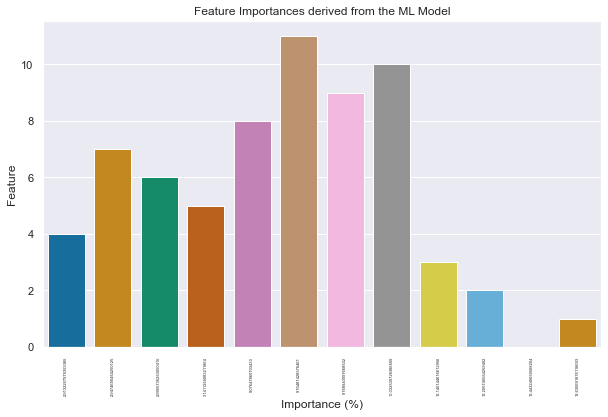

In [31]:
#feature Importance
X_train = pd.DataFrame(X_train)
importances_df = pd.Series(RFC_model.feature_importances_ * 100, list(X_train.columns)).to_frame()

top_15_importances = importances_df.reset_index().rename(columns ={
                              'index': 'Feature',
                              0: 'Importance (%)'  
                            }).sort_values('Importance (%)', ascending=False).head(15)
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x="Importance (%)", data=top_15_importances, palette='colorblind')
plt.title('Feature Importances derived from the ML Model')
plt.xticks(rotation='vertical', size=4)
plt.show()